In [2]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')


In [63]:
cond = df['Species'].isin(['Bream', 'Smelt'])
lw_df = df.loc[cond, ['Length2', 'Weight']]
fish_data = lw_df.values.tolist() #정보

In [53]:
fish_target = [1] * 35 + [0] * 14 #정답 

# fish_target

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier()

In [11]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [12]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [13]:
# 0.0점이 나온이유 : 훈련 세트와 테스트 세트가 달라서

kn.score(test_input, test_target)

0.0

### numpy

In [14]:
import numpy as np

In [15]:
# list를 넘파이 형태로 바꿈

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [19]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [20]:
# fancy indexing : 1, 3번 원하는 데이터만 뽑을 때

input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [27]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [28]:
import matplotlib.pyplot as plt

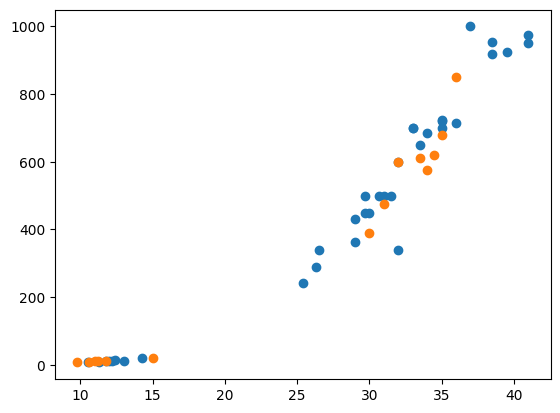

In [29]:
plt.scatter(train_input[:, 0], train_input[:, 1]) #파랑색
plt.scatter(test_input[:,0], test_input[:,1]) #주황색

In [30]:
# 학습
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [31]:
# 정담 맞추기 : 100%

kn.score(test_input, test_target)

1.0

In [32]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## iris 실습
- setosa, versicolor 구분
    - petal_length	petal_width 기준으로 

In [33]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
# 1) irirs_data

cond = iris['species'].isin(['setosa', 'versicolor'])
sv_df = iris.loc[cond,['petal_length','petal_width']]
iris_data = sv_df.values.tolist() #정보

#iris_data

In [73]:
# 2) iris_target

iris_target = [1] * len(iris['species'] == 'setosa') + [0] * len(iris['species'] == 'versicolor')

In [85]:
input_arr = np.array(iris_data)
target_arr = np.array(iris_target)

In [86]:
index = np.arange(len(input_arr))
np.random.shuffle(index)
print(index)

[76 18 82 81 79 31 78 64 55 85 45 12 36  9 19 57 20 71 56 37 29 84 26 21
 41 74  2 67 98 30 22 15 58 11 48 51 66 27 38  4 32 42 88 92 16 10 50 90
 75 54 65 99  6 63  0 60 69 28 40 44 68 87 93 24 25 23 97 39 72 14 47 13
 61 73 33 94 17 62 86 95 53  5 96  3 49 35 80 77 34 46  7 43 70 59 91 83
  1 52 89  8]


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
kn = KNeighborsClassifier()

In [93]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [94]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [95]:
kn.score(test_input, test_target)

1.0

In [110]:
# 1) 

cond = iris['species'].isin(['setosa', 'versicolor'])
iris_df = iris.loc[cond,['petal_length','petal_width']]
iris_data = iris_df.values.tolist() #정보

In [111]:
# 2) 

setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0]
versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0]

In [112]:
# 3) 

import numpy as np
iris_target = np.array([1] * setosa_count + [0] * versicolor_count)

In [113]:
# 4) 섞어주기

import random

index = list(range(setosa_count + versicolor_count))
random.shuffle(index)
index

[75,
 31,
 30,
 2,
 95,
 57,
 20,
 84,
 47,
 55,
 68,
 94,
 85,
 88,
 39,
 44,
 38,
 16,
 29,
 19,
 12,
 60,
 14,
 82,
 69,
 43,
 34,
 0,
 81,
 97,
 99,
 35,
 40,
 96,
 8,
 98,
 25,
 53,
 83,
 5,
 89,
 58,
 17,
 48,
 91,
 80,
 70,
 3,
 9,
 78,
 28,
 42,
 15,
 6,
 52,
 79,
 72,
 67,
 10,
 22,
 62,
 59,
 13,
 7,
 74,
 32,
 86,
 50,
 64,
 54,
 46,
 77,
 26,
 11,
 73,
 49,
 87,
 18,
 33,
 41,
 24,
 36,
 37,
 45,
 61,
 71,
 76,
 27,
 23,
 93,
 51,
 63,
 90,
 21,
 92,
 1,
 66,
 56,
 4,
 65]

In [114]:
train_input = iris_data[index[:70]] # 0:70
train_target = iris_target[index[:70]]

TypeError: list indices must be integers or slices, not list

In [ ]:
test_input = iris_data[index[70:]] #test_input : 30
test_target = iris_target[index[70:]]

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])